In [1]:
# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 

In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


In [3]:
data_label1 = train_data[train_labels==1]
data_label2 = train_data[train_labels==2]
mask = np.logical_or(train_labels==1,train_labels==2)
print(mask.shape)
train_data = train_data[mask]
print(train_data.shape)
train_labels = train_labels[mask]
print(train_labels.shape)

(6000,)
(1200, 784)
(1200,)


In [4]:
mask = np.logical_or(test_labels==1,test_labels==2)
print(mask.shape)
test_data = test_data[mask]
print(test_data.shape)
test_labels = test_labels[mask]
print(test_labels.shape)

(1000,)
(200, 784)
(200,)


(1200, 2)
(200, 2)


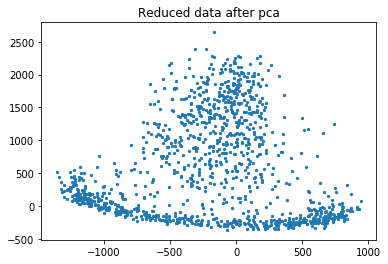

In [5]:
C = np.cov(train_data.transpose())    
eigvals, eigvecs = np.linalg.eigh(C)
eigvals = eigvals[::-1]
eigvecs = eigvecs.T[::-1]
pc2d = eigvecs[:2,:]

projected_train = np.dot(train_data, pc2d.T )
projected_test = np.dot(test_data, pc2d.T)
print(projected_train.shape)
print(projected_test.shape)

plt.title("Reduced data after pca")
plt.scatter(projected_train[:,1],projected_train[:,0],s=5)

Text(0.5, 1.0, 'Reduced dataset in 2 dimaensions with classes 1 and 2')

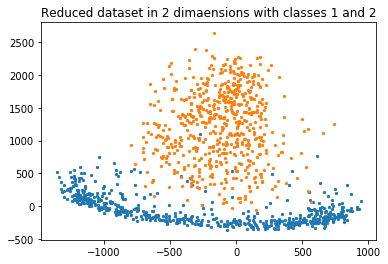

In [6]:
projected_data1 = np.dot(data_label1, pc2d.T ).real
projected_data2 = np.dot(data_label2, pc2d.T ).real
plt.scatter(projected_data1[:,1],projected_data1[:,0],s=5)
plt.scatter(projected_data2[:,1],projected_data2[:,0],s=5)
plt.title("Reduced dataset in 2 dimaensions with classes 1 and 2")

In [7]:
def classify_SVM(train_data, train_label, test_data, test_label, C, ktype):
    classifier = SVC(kernel=ktype,C=C)
    classifier.fit(train_data, train_label)
    print("SVM Prediction Accuracy for C =", C, " -> ", classifier.score(test_data,test_label))
    return classifier

In [8]:
svc = classify_SVM(projected_train, train_labels, projected_test, test_labels, 10,'linear')

SVM Prediction Accuracy for C = 10  ->  0.92


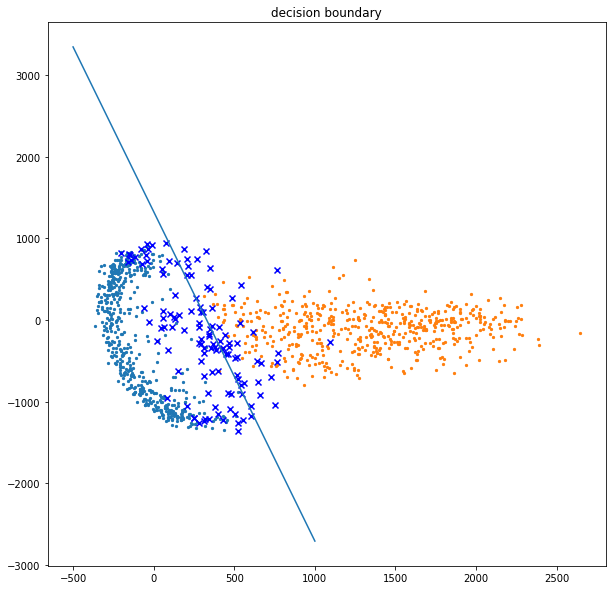

In [13]:
plt.rcParams['figure.figsize'] = [10,10]
w = svc.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-500, 1000)
yy = a * xx - (svc.intercept_[0])/w[1]
plt.scatter(projected_data1[:,0],projected_data1[:,1],s=5)
plt.scatter(projected_data2[:,0],projected_data2[:,1],s=5)
plt.plot(xx, yy)
support_vecs = svc.support_vectors_
plt.scatter(support_vecs[:, 0], support_vecs[:, 1], marker='x', c='b')
plt.title("decision boundary")
plt.show()

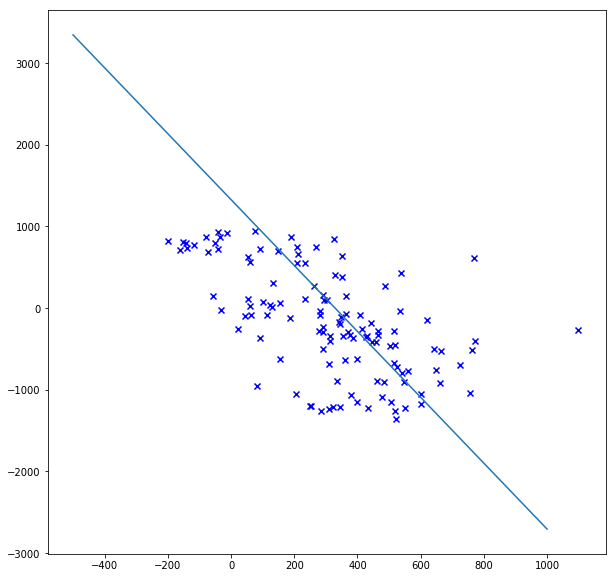

In [12]:
plt.rcParams['figure.figsize'] = [10,10]
w = svc.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-500, 1000)
yy = a * xx - (svc.intercept_[0])/w[1]
plt.plot(xx, yy)
support_vecs = svc.support_vectors_
plt.scatter(support_vecs[:, 0], support_vecs[:, 1], marker='x', c='b')
plt.title("support vectors")
plt.show()

In [10]:
classify_SVM(projected_train, train_labels, projected_test, test_labels, 0.00000000005,'linear')

SVM Prediction Accuracy for C = 5e-11  ->  0.69


SVC(C=5e-11, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
classify_SVM(projected_train, train_labels, projected_test, test_labels, 100000,'linear')

SVM Prediction Accuracy for C = 100000  ->  0.915


SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)